In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
sns.set()


    

In [2]:
data = pd.read_csv('MFGEmployees4.csv')
data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [3]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [4]:
new_data = data.copy()
new_data = new_data.sample(100)
new_data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
5493,5494,Perry,Jan,F,Squamish,Baker,Bakery,Squamish,Stores,52.904039,5.826458,101.356118,Stores
4053,4054,Wetter,Lillian,F,Bamfield,Shelf Stocker,Processed Foods,Victoria,Stores,31.527971,6.781417,46.492782,Stores
553,554,Jankowski,Steven,M,Vancouver,Baker,Bakery,Vancouver,Stores,46.935129,4.076902,50.990823,Stores
2268,2269,Weisz,Lisa,F,Port Coquitlam,Customer Service Manager,Customer Service,Port Coquitlam,Stores,41.901783,6.544206,79.336224,Stores
1437,1438,Filer,Thomas,M,Cortes Island,Dairy Person,Dairy,Cortes Island,Stores,54.488868,4.599104,134.729589,Stores


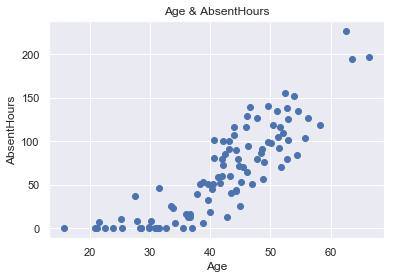

In [6]:
plt.scatter(new_data['Age'],new_data['AbsentHours'])
plt.xlabel('Age')
plt.ylabel('AbsentHours')
plt.title('Age & AbsentHours')
plt.show()

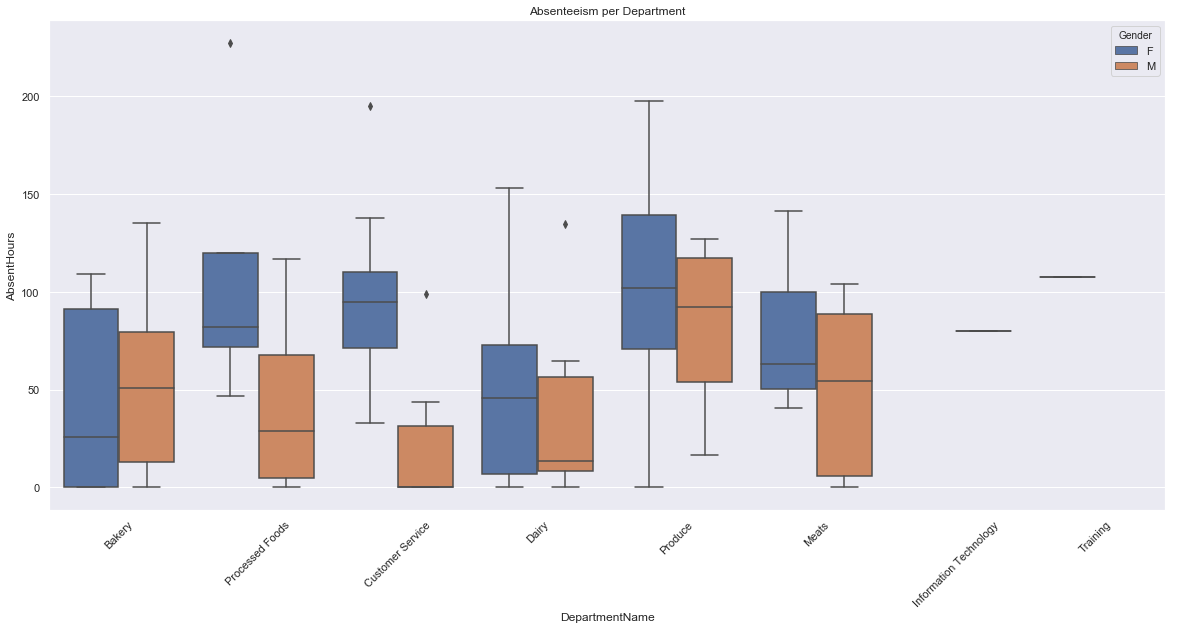

In [12]:
plt.figure(figsize=(20, 9))
sns.boxplot(new_data["DepartmentName"],new_data["AbsentHours"], hue="Gender", data=new_data)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Department');

Text(0.5,1,'Absenteeism per Division')

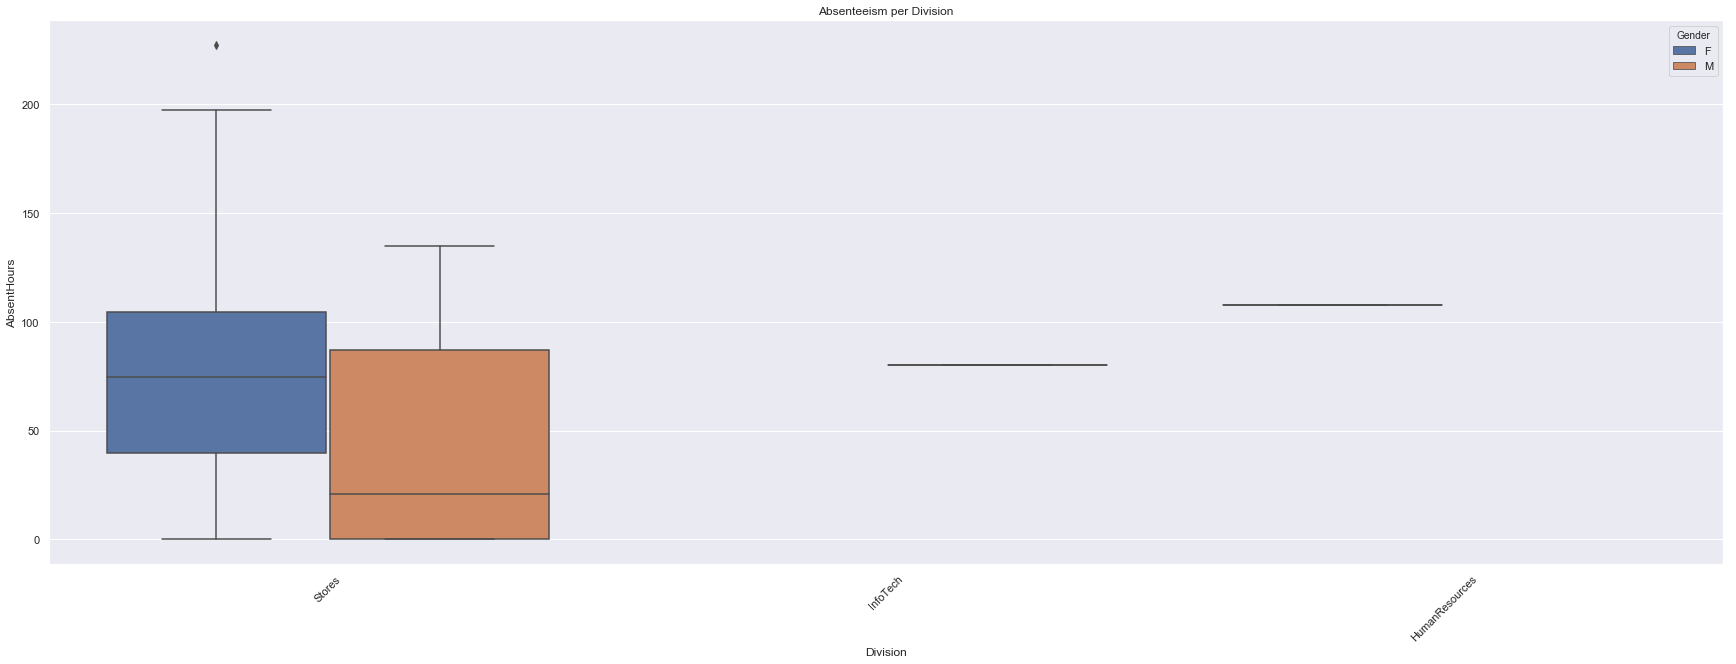

In [17]:
plt.figure(figsize=(30, 10))
sns.boxplot(new_data["Division"],new_data["AbsentHours"], hue="Gender", data=new_data)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Division')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

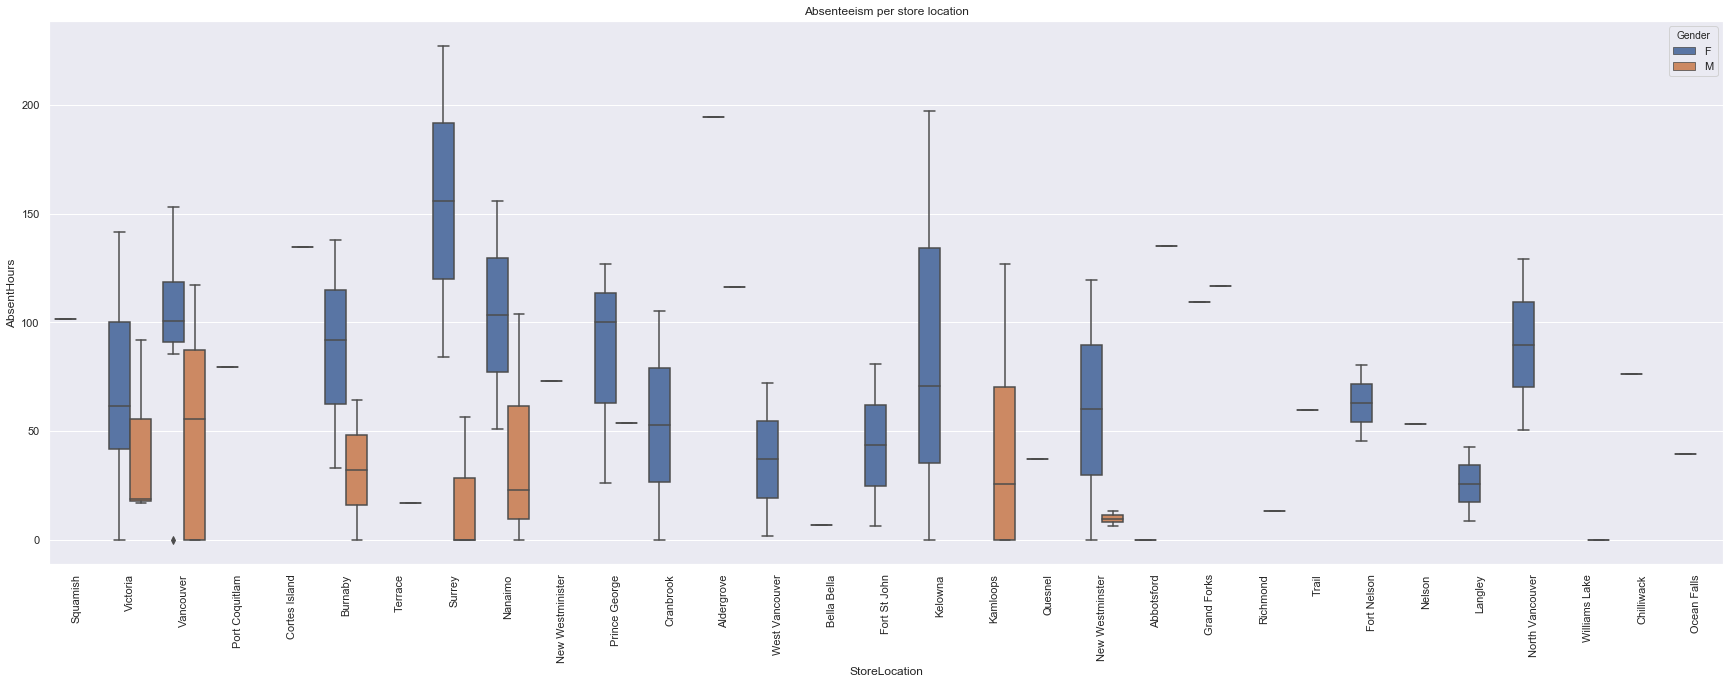

In [18]:
plt.figure(figsize=(30, 10))
sns.boxplot(new_data["StoreLocation"],new_data["AbsentHours"], hue="Gender", data=new_data)
plt.title('Absenteeism per store location')
plt.xticks(rotation = 90)

In [22]:
avg_male_absent = new_data.AbsentHours[new_data.Gender == 'M'].mean()
avg_female_absent = new_data.AbsentHours[new_data.Gender == 'F'].mean()


In [25]:
avg_male_absent


46.279478433

In [26]:
avg_female_absent


76.72829243961019